In [4]:
!pip install seaborn --upgrade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df_0 = pd.read_csv("https://raw.githubusercontent.com/AncaAl/CO2_emission/main/CO2_emission.csv")
df_0

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


### Clean & get familar with DataSet

In [3]:
df_0.shape

(935, 12)

In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [5]:
#Check for missing values
df_0.isna().any()

Model_Year                                False
Make                                      False
Model                                     False
Vehicle_Class                             False
Engine_Size                               False
Cylinders                                 False
Transmission                              False
Fuel_Consumption_in_City(L/100 km)        False
Fuel_Consumption_in_City_Hwy(L/100 km)    False
Fuel_Consumption_comb(L/100km)            False
CO2_Emissions                             False
Smog_Level                                False
dtype: bool

In [6]:
df_0.isna().sum()

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

In [7]:
df_0['Model'].unique()

array(['ILX', 'NSX', 'RDX SH-AWD', 'RDX SH-AWD A-SPEC', 'TLX SH-AWD',
       'TLX SH-AWD A-SPEC', 'Giulia', 'Giulia AWD', 'Giulia Quadrifoglio',
       'Stelvio', 'Stelvio AWD', 'Stelvio AWD Quadrifoglio', 'DB11 V8',
       'DB11 AMR', 'DBS Superleggera', 'DBX V8', 'Vantage V8',
       'A4 allroad 45 TFSI quattro', 'A4 Sedan 40 TFSI quattro',
       'A4 Sedan 45 TFSI quattro', 'A5 Cabriolet 45 TFSI quattro',
       'A5 Coupe 45 TFSI quattro', 'A5 Sportback 45 TFSI quattro',
       'A6 allroad 55 TFSI quattro', 'A6 Sedan 45 TFSI quattro',
       'A6 Sedan 55 TFSI quattro', 'A7 Sportback 55 TFSI quattro',
       'A8 L Sedan 55 TFSI quattro', 'A8 L Sedan 60 TFSI quattro',
       'Q3 40 TFSI quattro', 'Q3 45 TFSI quattro', 'Q5 45 TFSI quattro',
       'Q5 Sportback 45 TFSI quattro', 'Q7 45 TFSI quattro',
       'Q7 55 TFSI quattro', 'Q8 55 TFSI quattro', 'R8 Coupe',
       'R8 Coupe quattro', 'R8 Spyder', 'R8 Spyder quattro',
       'RS 5 Coupe quattro', 'RS 5 Sportback quattro',
       'R

In [8]:
df_0['Transmission'].value_counts()

Transmission
AS8     206
A9       95
A8       92
AS10     77
AM7      70
M6       67
A10      59
AS6      56
AM8      44
AV       41
A6       36
AV8      15
AS9      14
AV7      11
AM6       9
M7        9
AV6       9
AS7       7
AV10      6
M5        5
AV1       4
AS5       2
AM9       1
Name: count, dtype: int64

### Clasify columns

In [9]:
unique_vehicle_classes = df_0['Vehicle_Class'].unique()
print("Unique Vehicle Classes:", unique_vehicle_classes)

Unique Vehicle Classes: ['Compact' 'Two-seater' 'SUV: Small' 'Mid-size' 'Minicompact'
 'SUV: Standard' 'Station wagon: Small' 'Subcompact'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Van: Passenger'
 'Special purpose vehicle']


In [10]:
# Define a mapping function for vehicle classes
def classify_vehicle(vehicle_class):
    if vehicle_class in ['Compact', 'Subcompact', 'Minicompact']:
        return 'Compact Cars'
    elif vehicle_class == 'Two-seater':
        return 'Luxury and Sport Vehicles'
    elif vehicle_class == 'SUV: Small':
        return 'Small SUVs'
    elif vehicle_class in ['SUV: Standard', 'Mid-size', 'Full-size']:
        return 'Standard and Full-size SUVs'
    else:
        return 'Other/Unclassified'

# Apply the classification function to each row in the DataFrame
df_0['New_Class'] = df_0['Vehicle_Class'].apply(classify_vehicle)

# Display the updated DataFrame
df_0

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,New_Class
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3,Compact Cars
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3,Luxury and Sport Vehicles
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6,Small SUVs
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6,Small SUVs
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7,Compact Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5,Small SUVs
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5,Small SUVs
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7,Small SUVs
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5,Standard and Full-size SUVs


### Map the vehicule categories into: 
['Compact Cars' 'Luxury and Sport Vehicles' 'Small SUVs' 'Standard and Full-size SUVs' 'Other/Unclassified']

In [11]:

print("Unique Vehicle Classes before mapping:", df_0['Vehicle_Class'].unique())

# Define a mapping function for vehicle classes
def classify_vehicle(vehicle_class):
    if vehicle_class in ['Compact', 'Subcompact', 'Minicompact']:
        return 'Compact Cars'
    elif vehicle_class == 'Two-seater':
        return 'Luxury and Sport Vehicles'
    elif vehicle_class == 'SUV: Small':
        return 'Small SUVs'
    elif vehicle_class in ['SUV: Standard', 'Mid-size', 'Full-size']:
        return 'Standard and Full-size SUVs'
    else:
        return 'Other/Unclassified'


df_0['New_Class'] = df_0['Vehicle_Class'].apply(classify_vehicle)

print("Unique New Classes after mapping:", df_0['New_Class'].unique())

# Display the updated DataFrame
df_0

Unique Vehicle Classes before mapping: ['Compact' 'Two-seater' 'SUV: Small' 'Mid-size' 'Minicompact'
 'SUV: Standard' 'Station wagon: Small' 'Subcompact'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Van: Passenger'
 'Special purpose vehicle']
Unique New Classes after mapping: ['Compact Cars' 'Luxury and Sport Vehicles' 'Small SUVs'
 'Standard and Full-size SUVs' 'Other/Unclassified']


,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,New_Class
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3,Compact Cars
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3,Luxury and Sport Vehicles
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6,Small SUVs
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6,Small SUVs
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7,Compact Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5,Small SUVs
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5,Small SUVs
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7,Small SUVs
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5,Standard and Full-size SUVs


Splitting the transmission into two columns

In [12]:
# Function to extract transmission type
def extract_transmission_type(trans):
    return ''.join([char for char in trans if char.isalpha()])

# Function to extract number of gears
def extract_number_of_gears(trans):
    return ''.join([char for char in trans if char.isdigit()])

# Apply the functions to create new columns
df_0['Transmission_Type'] = df_0['Transmission'].apply(extract_transmission_type)
df_0['Number_of_Gears'] = df_0['Transmission'].apply(extract_number_of_gears)

# Display the updated DataFrame
df_0

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,New_Class,Transmission_Type,Number_of_Gears
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3,Compact Cars,AM,8
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3,Luxury and Sport Vehicles,AM,9
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6,Small SUVs,AS,10
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6,Small SUVs,AS,10
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7,Compact Cars,AS,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5,Small SUVs,AS,8
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5,Small SUVs,AS,8
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7,Small SUVs,AS,8
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5,Standard and Full-size SUVs,AS,8


In [13]:
#check for null values 

df_0.isnull().sum()

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
New_Class                                 0
Transmission_Type                         0
Number_of_Gears                           0
dtype: int64

### Drop columns

In [14]:
df = df_0.drop(columns = ["Model_Year", "Model",'Transmission'])
df

,Make,Vehicle_Class,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,New_Class,Transmission_Type,Number_of_Gears
0,Acura,Compact,2.4,4,9.9,7.0,8.6,199,3,Compact Cars,AM,8
1,Acura,Two-seater,3.5,6,11.1,10.8,11.0,256,3,Luxury and Sport Vehicles,AM,9
2,Acura,SUV: Small,2.0,4,11.0,8.6,9.9,232,6,Small SUVs,AS,10
3,Acura,SUV: Small,2.0,4,11.3,9.1,10.3,242,6,Small SUVs,AS,10
4,Acura,Compact,2.0,4,11.2,8.0,9.8,230,7,Compact Cars,AS,10
...,...,...,...,...,...,...,...,...,...,...,...,...
930,Volvo,SUV: Small,2.0,4,10.7,7.7,9.4,219,5,Small SUVs,AS,8
931,Volvo,SUV: Small,2.0,4,11.1,8.3,9.9,230,5,Small SUVs,AS,8
932,Volvo,SUV: Small,2.0,4,11.7,8.6,10.3,240,7,Small SUVs,AS,8
933,Volvo,SUV: Standard,2.0,4,11.5,8.4,10.1,236,5,Standard and Full-size SUVs,AS,8


In [15]:
df_0['Transmission_Type'].value_counts()

Transmission_Type
AS    362
A     282
AM    124
AV     86
M      81
Name: count, dtype: int64

### Define num & obj columns

In [16]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,9.9,7.0,8.6,199,3
1,3.5,6,11.1,10.8,11.0,256,3
2,2.0,4,11.0,8.6,9.9,232,6
3,2.0,4,11.3,9.1,10.3,242,6
4,2.0,4,11.2,8.0,9.8,230,7


In [17]:
object_columns = df.select_dtypes(include=['object'])
object_columns.head()

,Make,Vehicle_Class,New_Class,Transmission_Type,Number_of_Gears
0,Acura,Compact,Compact Cars,AM,8
1,Acura,Two-seater,Luxury and Sport Vehicles,AM,9
2,Acura,SUV: Small,Small SUVs,AS,10
3,Acura,SUV: Small,Small SUVs,AS,10
4,Acura,Compact,Compact Cars,AS,10


In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for these columns
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(int)

# Display the DataFrame with dummy variables
df_dummies.head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Transmission_Type_AS,Transmission_Type_AV,Transmission_Type_M,Number_of_Gears_1,Number_of_Gears_10,Number_of_Gears_5,Number_of_Gears_6,Number_of_Gears_7,Number_of_Gears_8,Number_of_Gears_9
0,2,4,9,7,8,199,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,6,11,10,11,256,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,4,11,8,9,232,6,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2,4,11,9,10,242,6,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2,4,11,8,9,230,7,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [19]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

NameError: name 'corr' is not defined

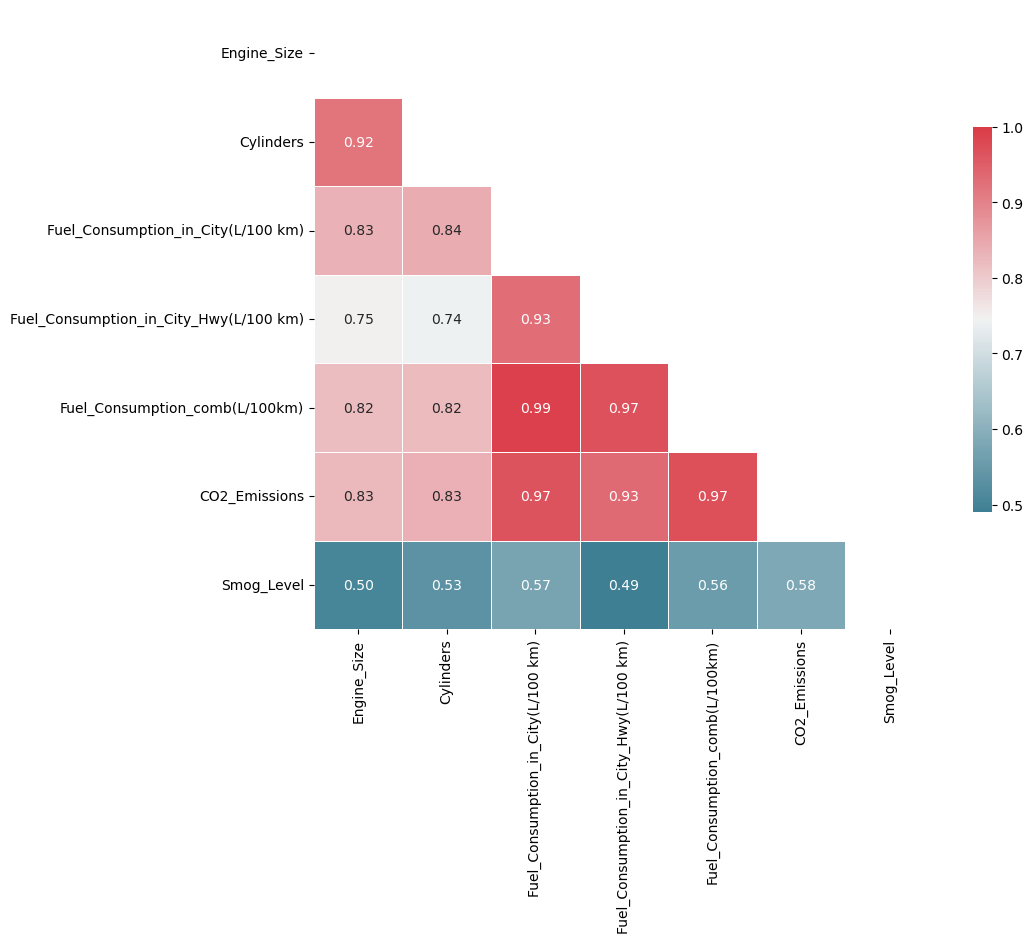

In [20]:
# using the numerical columns here
corr = np.abs(numerical_columns.corr())

# Set up mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()

### **Perform Train Test Split**

In [21]:

X = df_dummies.drop('CO2_Emissions', axis=1)  # Features
y = df_dummies['CO2_Emissions']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (748, 72) (748,)
Testing set shape: (187, 72) (187,)


### Normalization

In [22]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [23]:
X_train_norm

array([[0.        , 0.07692308, 0.19230769, ..., 0.        , 0.        ,
        1.        ],
       [0.14285714, 0.07692308, 0.26923077, ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.23076923, 0.34615385, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14285714, 0.07692308, 0.19230769, ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.07692308, 0.15384615, ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.07692308, 0.23076923, ..., 0.        , 1.        ,
        0.        ]])

In [24]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),Smog_Level,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,...,Transmission_Type_AS,Transmission_Type_AV,Transmission_Type_M,Number_of_Gears_1,Number_of_Gears_10,Number_of_Gears_5,Number_of_Gears_6,Number_of_Gears_7,Number_of_Gears_8,Number_of_Gears_9
0,0.000000,0.076923,0.192308,0.294118,0.227273,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.142857,0.076923,0.269231,0.294118,0.227273,1.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.285714,0.230769,0.346154,0.352941,0.318182,0.666667,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.142857,0.076923,0.346154,0.588235,0.409091,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.142857,0.076923,0.192308,0.235294,0.181818,0.833333,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
corr = np.abs(df_dummies.corr())

In [26]:
# drop fuel consumptiopn in city 

In [27]:
numerical_columns_reduced = numerical_columns.drop(columns = ["Fuel_Consumption_in_City(L/100 km)"])

In [28]:
numerical_columns_reduced.head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,7.0,8.6,199,3
1,3.5,6,10.8,11.0,256,3
2,2.0,4,8.6,9.9,232,6
3,2.0,4,9.1,10.3,242,6
4,2.0,4,8.0,9.8,230,7


### KNN Modeling

In [29]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_norm, y_train)

knn.score(X_test_norm, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.7836425338062337

### Liniar Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train_norm, y_train)

pred = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 7.708817989218357
RMSE 13.338776371045649
R2 score 0.9558309060250572


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Decission Trees

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 3)

dt.fit(X_train_norm, y_train)

dt.score(X_test_norm, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.9222671106431314

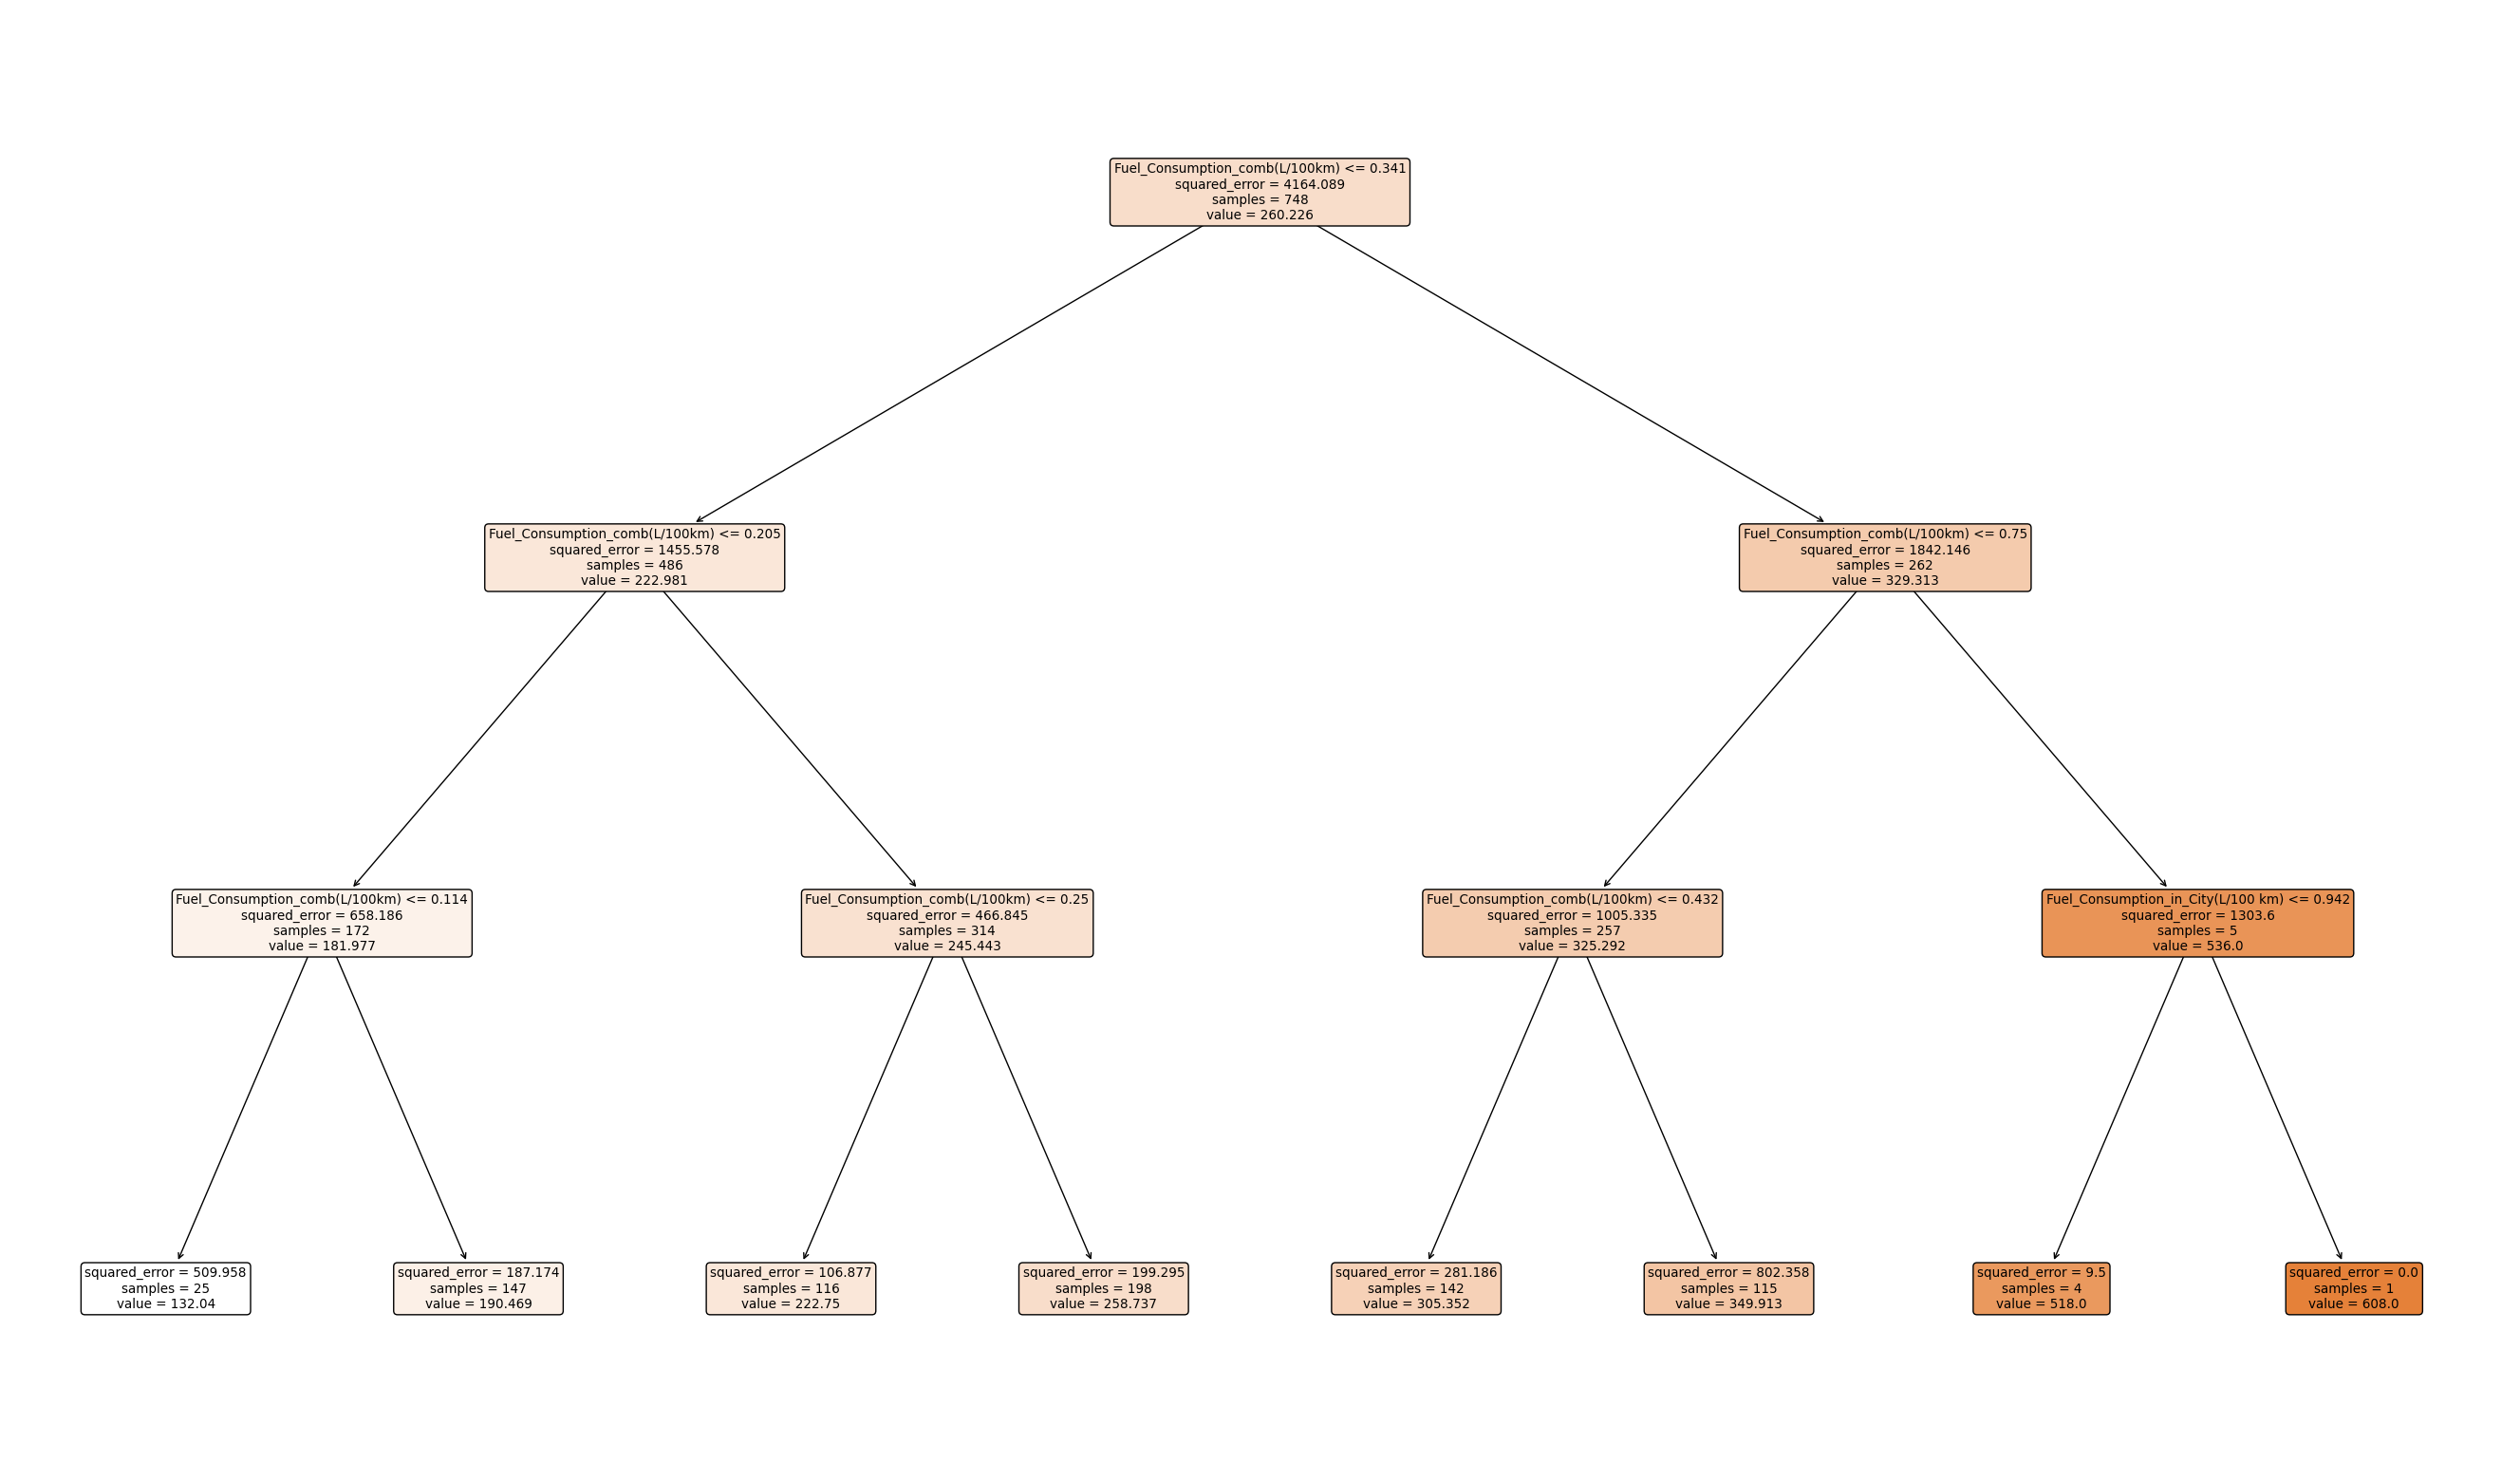

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree( dt,filled = True, rounded=True,feature_names=list(X.columns))
plt.show()

### Bagging and Pasting

In [32]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Get the number of samples in the training data
n_samples = X_train_norm.shape[0]

# Ensure max_samples is within the valid range
max_samples = min(1000, n_samples)


bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = max_samples)

In [33]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20), max_samples=748,
                 n_estimators=100)

In [34]:
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 4.111964928469174
RMSE 6.950946630986771
R2 score 0.9880057135693188


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


### Random Patches

In [35]:
# Initialize a Random Forest
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

# Training the model
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [36]:
#Evaluate the model:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 4.092839944853257
RMSE 6.751547718073361
R2 score 0.9886839934353239


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### AdaBoost

In [37]:
#Initialize a AdaBoost model:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

# Training the model
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [38]:
#Evaluate the model
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 3.0517780577334648
RMSE 4.59022567683812
R2 score 0.9947693629732925


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


### Gradient Boosting

In [39]:
# Initialize a AdaBoost model
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

# Training the model
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [40]:
# Evaluate the model
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 4.798183136369679
RMSE 10.88598284756328
R2 score 0.9705814136914124


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### Grid Search
- our best model was AdaBoost yield a R-Squared of 0.99.

In [65]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression

grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [66]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [67]:
model.best_params_

{'n_estimators': 800,
 'estimator__max_leaf_nodes': 500,
 'estimator__max_depth': 80}

In [68]:
best_model = model.best_estimator_

In [69]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

NotFittedError: This AdaBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Random Search

In [49]:
grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        "estimator__max_leaf_nodes": [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)],
        "estimator__max_depth":[int(x) for x in np.linspace(10, 110, num = 11)]}

In [50]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())

model = RandomizedSearchCV(estimator = ada_reg, param_distributions = grid, n_iter = 10, cv = 5, n_jobs = -1)

In [51]:
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110],
                                        'estimator__max_leaf_nodes': [500, 777,
                                                                      1055,
                                                                      1333,
                                                                      1611,
                                                                      1888,
                                                                      2166,
                                                                      2444,
                                                                      2722,
                                                                      3000],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [52]:
model.best_params_

{'n_estimators': 1600,
 'estimator__max_leaf_nodes': 1888,
 'estimator__max_depth': 50}

In [53]:
best_model = model.best_estimator_

In [54]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 3.816238733679846
RMSE 8.983353409001463
R2 score 0.9799661933283067


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


### Predict CO2 Emissions on New Data

In [55]:
# Assuming new_data is a DataFrame containing the new data points without the target variable
#new_data = pd.read_csv("https://raw.githubusercontent.com/AncaAl/CO2_emission/main/CO2_emission.csv")
new_data = df
# Ensure new_data is processed in the same way as X before training
new_predictions = ada_reg.predict(new_data)

# If you want to save these predictions to a CSV file
new_data['CO2_Emissions_Predictions'] = new_predictions
new_data.to_csv('new_data_with_predictions.csv', index=False)

NotFittedError: This AdaBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [57]:
new_data.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,New_Class,Transmission_Type,Number_of_Gears
0,Acura,Compact,2.4,4,9.9,7.0,8.6,199,3,Compact Cars,AM,8
1,Acura,Two-seater,3.5,6,11.1,10.8,11.0,256,3,Luxury and Sport Vehicles,AM,9
2,Acura,SUV: Small,2.0,4,11.0,8.6,9.9,232,6,Small SUVs,AS,10
3,Acura,SUV: Small,2.0,4,11.3,9.1,10.3,242,6,Small SUVs,AS,10
4,Acura,Compact,2.0,4,11.2,8.0,9.8,230,7,Compact Cars,AS,10
